In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('default') # set style (colors, background, size, gridlines etc.) # ggplot
plt.rcParams['figure.figsize'] = 8, 4 # set default size of plots
plt.rcParams.update({'font.size': 18})

import scraping_class
logfile = 'log.txt' ## name your log file.
connector = scraping_class.Connector(logfile)

from bs4 import BeautifulSoup
from tqdm import tqdm_notebook as tqdm

In [201]:
#pip install cpi

In [202]:
movies = pd.read_csv('IMDb movies.csv')
actors = pd.read_csv('IMDb names.csv')
ratings = pd.read_csv('IMDb ratings.csv')
role = pd.read_csv('IMDb title_principals.csv')

In [203]:
# IMDb - Remove duplicates and all years before 1990

movies_90 = movies[movies.year >= 1990] # (53368, 22)
#movies_90 = movies.drop(movies[movies['year'] < 1990].index)
movies_us = movies[movies.country == 'USA']
movies_us_90 = movies_us[movies_us.year >= 1990]
movies_90['title'] = movies_90['title'].astype(str)
movies_90 = movies_90.drop_duplicates(subset = 'title')
mocies_us_90 = movies_us_90.drop_duplicates(subset = 'title')

/Users/Messias/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [206]:
# RT - Remove duplicates 
df_RT = pd.read_csv('RT.csv').drop_duplicates(subset = 'title')
df_90 = pd.merge(movies_90,df_RT,how='inner',on='title')
df_90 = df_90.drop_duplicates()
df_90_us = pd.merge(movies_us_90,df_RT,how='inner',on='title')
df_90_us = df_90_us.drop_duplicates()

In [207]:
# **** Remove NaN ****
df_90_income = df_90.dropna(subset = ['worlwide_gross_income']).reset_index(drop=True).drop_duplicates()
df_us = df_90_us[df_90_us['worlwide_gross_income'].notna()].reset_index(drop=True)

#df_90_income.dtypes
#df_90_income.head()
#print(df_90_income.shape)
#df_90
df_90_income

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,tomatometer_score,audience_score
0,tt0035423,Kate & Leopold,Kate & Leopold,2001,2002-04-05,"Comedy, Fantasy, Romance",118,USA,"English, French",James Mangold,...,6.4,75298,$ 48000000,$ 47121859,$ 76019048,44.0,330.0,127.0,50%,62%
1,tt0098994,"After Dark, My Sweet","After Dark, My Sweet",1990,1990-08-24,"Crime, Drama, Mystery",114,USA,English,James Foley,...,6.6,3019,NaN,$ 2678414,$ 2678414,78.0,46.0,28.0,82%,61%
2,tt0099005,Air America,Air America,1990,1991-02-22,"Action, Comedy, War",113,USA,"English, Lao",Roger Spottiswoode,...,5.8,25683,$ 35000000,$ 31053601,$ 33461269,33.0,49.0,28.0,13%,34%
3,tt0099012,Alice,Alice,1990,1991-01-10,"Comedy, Romance",106,USA,"English, Cantonese",Woody Allen,...,6.6,12574,$ 12000000,$ 7331647,$ 7331647,67.0,65.0,59.0,75%,57%
4,tt0099018,Almost an Angel,Almost an Angel,1990,1990-12-27,"Comedy, Drama",95,USA,English,John Cornell,...,5.5,3760,$ 25000000,$ 6939946,$ 6939946,NaN,26.0,10.0,29%,48%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7245,tt9109306,The Final Wish,The Final Wish,2018,2019-01-24,Horror,95,USA,English,Timothy Woodward Jr.,...,4.2,2342,NaN,$ 25183,$ 82959,NaN,78.0,18.0,73%,26%
7246,tt9206798,All Is True,All Is True,2018,2019-02-08,"Biography, Drama, History",101,UK,English,Kenneth Branagh,...,6.1,1956,NaN,$ 1200481,$ 3019143,59.0,62.0,64.0,72%,67%
7247,tt9352926,The Sound of Silence,The Sound of Silence,2019,2019-09-13,Drama,85,USA,English,Michael Tyburski,...,5.3,426,NaN,$ 20013,$ 21994,66.0,14.0,15.0,65%,Nan
7248,tt9354944,Jexi,Jexi,2019,2019-10-11,Comedy,84,USA,English,"Jon Lucas, Scott Moore",...,6.6,3674,$ 5000000,$ 6546159,$ 7257918,39.0,46.0,24.0,17%,71%


In [208]:
# CPI inflation 
import cpi
#cpi.update()

def inflate_column(data, column):
    '''Inflate monetary figures from a given year to their 2018 values'''
    return data.apply(lambda x: cpi.inflate(x[column], x.year), axis=1)

In [209]:

df_90_income['worldwide_gross_income'] = df_90_income['worlwide_gross_income']\
                                        .apply(lambda x:x[1:] if x and x[:1]== '$' else None)
df_90_income = df_90_income.drop('worlwide_gross_income', axis=1)
df_90_income = df_90_income.dropna(subset = ['worldwide_gross_income'])

In [210]:
df_90_income = df_90_income.dropna(subset = ['budget'])
df_90_income['budget'] = df_90_income['budget'].apply(lambda x:x[1:] if x and x[:1]== '$' else None)


df_90_income = df_90_income.dropna(subset = ['usa_gross_income'])
df_90_income['usa_gross_income'] = df_90_income['usa_gross_income']\
                                        .apply(lambda x:x[1:] if x and x[:1]== '$' else None)

In [255]:
df_90_income = df_90_income.reset_index(drop=True).drop_duplicates()

df_90_income.worldwide_gross_income = df_90_income.worldwide_gross_income.astype(int)
df_90_income = df_90_income[df_90_income.year <= 2018]
df_90_income['adjusted_wgi'] = inflate_column(df_90_income, 'worldwide_gross_income')

df_budget = df_90_income.dropna(subset = ['budget']).copy()
df_budget.budget = df_budget.budget.astype(int)

df_budget['adjusted_budget'] = inflate_column(df_budget, 'budget')
df_budget['net_income'] = df_budget.adjusted_wgi - df_budget.adjusted_budget
#df_90_income.dtypes
df_budget.dtypes

imdb_title_id              object
title                      object
original_title             object
year                        int64
date_published             object
genre                      object
duration                    int64
country                    object
language                   object
director                   object
writer                     object
production_company         object
actors                     object
description                object
avg_vote                  float64
votes                       int64
budget                      int64
usa_gross_income           object
metascore                 float64
reviews_from_users        float64
reviews_from_critics      float64
tomatometer_score          object
audience_score             object
worldwide_gross_income      int64
adjusted                  float64
first_genre                object
adjusted_wgi              float64
adjusted_budget           float64
net_income                float64
dtype: object

In [249]:


df_budget

/Users/Messias/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,usa_gross_income,metascore,reviews_from_users,reviews_from_critics,tomatometer_score,audience_score,worldwide_gross_income,adjusted,first_genre,net_income
0,tt0035423,Kate & Leopold,Kate & Leopold,2001,2002-04-05,"Comedy, Fantasy, Romance",118,USA,"English, French",James Mangold,...,47121859,44.0,330.0,127.0,50%,62%,76019048,1.077861e+08,Comedy,28019048
1,tt0099005,Air America,Air America,1990,1991-02-22,"Action, Comedy, War",113,USA,"English, Lao",Roger Spottiswoode,...,31053601,33.0,49.0,28.0,13%,34%,33461269,6.428737e+07,Action,-1538731
2,tt0099012,Alice,Alice,1990,1991-01-10,"Comedy, Romance",106,USA,"English, Cantonese",Woody Allen,...,7331647,67.0,65.0,59.0,75%,57%,7331647,1.408591e+07,Comedy,-4668353
3,tt0099018,Almost an Angel,Almost an Angel,1990,1990-12-27,"Comedy, Drama",95,USA,English,John Cornell,...,6939946,NaN,26.0,10.0,29%,48%,6939946,1.333335e+07,Comedy,-18060054
4,tt0099044,Another 48 Hrs.,Another 48 Hrs.,1990,1990-09-21,"Action, Comedy, Crime",93,USA,"English, Cantonese",Walter Hill,...,80818974,23.0,71.0,31.0,18%,35%,153518974,2.949479e+08,Action,115518974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4534,tt7401588,Instant Family,Instant Family,2018,2019-02-14,"Comedy, Drama",118,USA,"English, Spanish",Sean Anders,...,67363237,57.0,473.0,137.0,81%,82%,120556201,1.205562e+08,Comedy,72556201
4535,tt7424200,Teen Titans Go! To the Movies,Teen Titans Go! To the Movies,2018,2018-08-03,"Animation, Action, Comedy",84,USA,English,"Aaron Horvath, Peter Rida Michail",...,29790236,69.0,203.0,111.0,91%,72%,52090236,5.209024e+07,Animation,42090236
4536,tt7668870,Searching,Searching,2018,2018-08-31,"Drama, Mystery, Thriller",102,"Russia, USA",English,Aneesh Chaganty,...,26020957,71.0,985.0,279.0,92%,87%,75462037,7.546204e+07,Drama,74582037
4537,tt7690670,Superfly,Superfly,2018,2018-09-14,"Action, Crime, Thriller",116,USA,"English, Spanish, Cantonese",Director X.,...,20545116,52.0,118.0,60.0,50%,46%,20780685,2.078068e+07,Action,4780685


In [212]:
# df_90 datasæt har også andre valuta som vi ikke har slettet. Derfor er hele kolonnen ikke samme type.
# Prøver på us datasæt i stedet
df_us['wgi'] = df_us['worlwide_gross_income'].replace({'\$':''}, regex = True)
df_us['budget'] = df_us['budget'].replace({'\$':''}, regex = True)
df_us['usa_gross_income'] = df_us['usa_gross_income'].replace({'\$':''}, regex = True)

In [214]:
#len(df_us[df_us.year==2019])
df_us.wgi = df_us.wgi.astype(int)
df_us = df_us[df_us.year <= 2018]
df_us['adjusted'] = inflate_column(df_us, 'wgi')
df_us

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,tomatometer_score,audience_score,wgi,adjusted
0,tt0035423,Kate & Leopold,Kate & Leopold,2001,2002-04-05,"Comedy, Fantasy, Romance",118,USA,"English, French",James Mangold,...,48000000,47121859,$ 76019048,44.0,330.0,127.0,50%,62%,76019048,1.077861e+08
1,tt0144142,Committed,Committed,2000,2000-07-14,"Comedy, Drama",98,USA,"English, Spanish",Lisa Krueger,...,3000000,40361,$ 40361,44.0,39.0,42.0,43%,35%,40361,5.885557e+04
2,tt0098994,"After Dark, My Sweet","After Dark, My Sweet",1990,1990-08-24,"Crime, Drama, Mystery",114,USA,English,James Foley,...,NaN,2678414,$ 2678414,78.0,46.0,28.0,82%,61%,2678414,5.145895e+06
3,tt0099005,Air America,Air America,1990,1991-02-22,"Action, Comedy, War",113,USA,"English, Lao",Roger Spottiswoode,...,35000000,31053601,$ 33461269,33.0,49.0,28.0,13%,34%,33461269,6.428737e+07
4,tt0099012,Alice,Alice,1990,1991-01-10,"Comedy, Romance",106,USA,"English, Cantonese",Woody Allen,...,12000000,7331647,$ 7331647,67.0,65.0,59.0,75%,57%,7331647,1.408591e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4285,tt7690670,Superfly,Superfly,2018,2018-09-14,"Action, Crime, Thriller",116,USA,"English, Spanish, Cantonese",Director X.,...,16000000,20545116,$ 20780685,52.0,118.0,60.0,50%,46%,20780685,2.078068e+07
4287,tt7738450,Thunder Road,Thunder Road,2018,2019-05-31,"Comedy, Drama",92,USA,English,Jim Cummings,...,191000,NaN,$ 456304,79.0,88.0,87.0,96%,93%,456304,4.563040e+05
4289,tt7784604,Hereditary,Hereditary,2018,2018-06-15,"Drama, Horror, Mystery",127,USA,"English, Spanish",Ari Aster,...,10000000,44069456,$ 79336821,87.0,2827.0,450.0,89%,67%,79336821,7.933682e+07
4305,tt8806104,The Dead Center,The Dead Center,2018,2018-09-21,"Horror, Mystery, Thriller",92,USA,English,Billy Senese,...,NaN,8320,$ 8320,63.0,24.0,20.0,94%,44%,8320,8.320000e+03


In [215]:
# Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

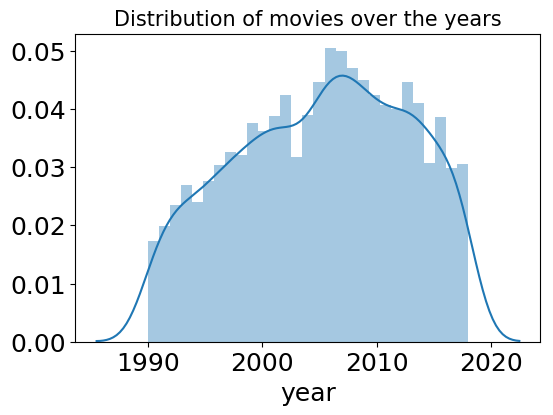

In [230]:
fig, ax = plt.subplots(figsize = (6,4))
sns.distplot(df_90_income.year, bins = 29);
plt.title("Distribution of movies over the years", size = 15);

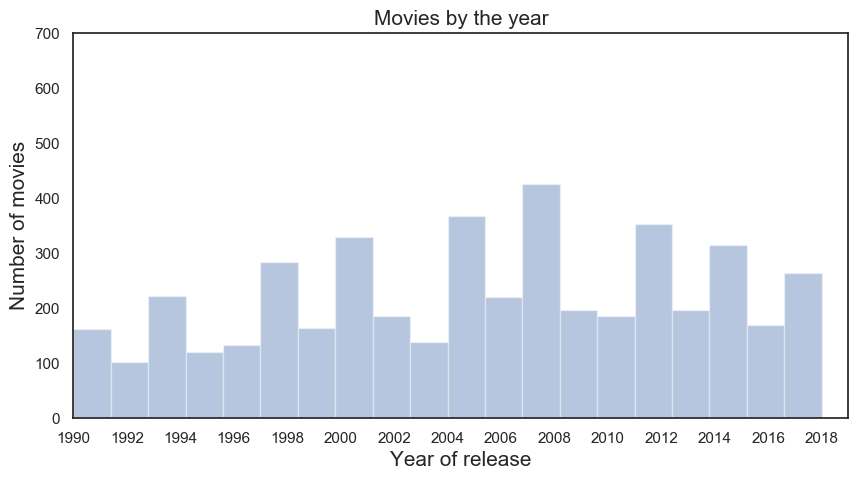

In [231]:
sns.set(style="white")

plt.figure(figsize=(10,5))
plt.title('Movies by the year', size=15)
sns.distplot(df_90_income.year, kde=False)
plt.ylabel('Number of movies', size=15)
plt.xlabel('Year of release',size=15)
plt.axis([1990, 2019, 0, 700])
plt.xticks(np.arange(1990, 2019, step=2))
plt.show()

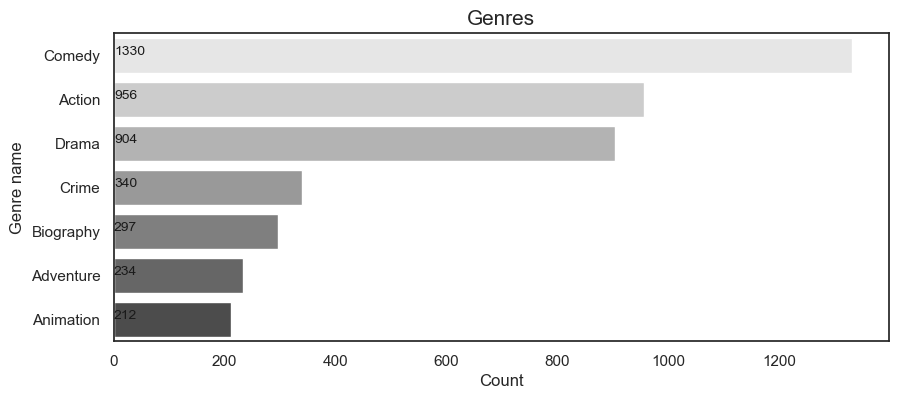

In [232]:
# Overview of the different genres 
df_90_income['first_genre'] = df_90_income['genre'].str.split(',').str[0]

a = plt.cm.binary

plt.figure(figsize=(10,4))
count = df_90_income['first_genre'].value_counts()[:7]
sns.barplot(count.values, count.index, palette=[a(0.1),a(0.2),a(0.3),a(0.4),a(0.5),a(0.6),a(0.7)])
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=10)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre name', fontsize=12)
plt.title("Genres", fontsize=15)
plt.show()

In [234]:
# Overview of movies with highest scores 
top_scored = df_90_income.sort_values(["tomatometer_score","audience_score","metascore","avg_vote"], ascending=False)[
    ["title", "director", "tomatometer_score","audience_score","metascore","avg_vote"]]
top_scored.index = range(len(df_90_income))
top_scored.head(n=10)

,title,director,tomatometer_score,audience_score,metascore,avg_vote
0,L.A. Confidential,Curtis Hanson,99%,94%,90.0,8.2
1,How to Train Your Dragon,"Dean DeBlois, Chris Sanders",99%,91%,74.0,8.1
2,Finding Nemo,"Andrew Stanton, Lee Unkrich",99%,86%,90.0,8.1
3,Selma,Ava DuVernay,99%,86%,88.0,7.5
4,Eighth Grade,Bo Burnham,99%,83%,89.0,7.4
5,Shaun the Sheep Movie,"Mark Burton, Richard Starzak",99%,81%,81.0,7.3
6,Lady Bird,Greta Gerwig,99%,79%,94.0,7.4
7,Le Havre,Aki Kaurismäki,99%,75%,82.0,7.2
8,Zootopia,"Byron Howard, Rich Moore",98%,92%,78.0,8.0
9,Up,"Pete Docter, Bob Peterson",98%,90%,88.0,8.2


In [235]:
test = df_90_income.sort_values(["year"], ascending=False)[
    ["year","tomatometer_score","audience_score","metascore","avg_vote"]]
test.index = range(len(df_90_income))
#test.head(n=10)


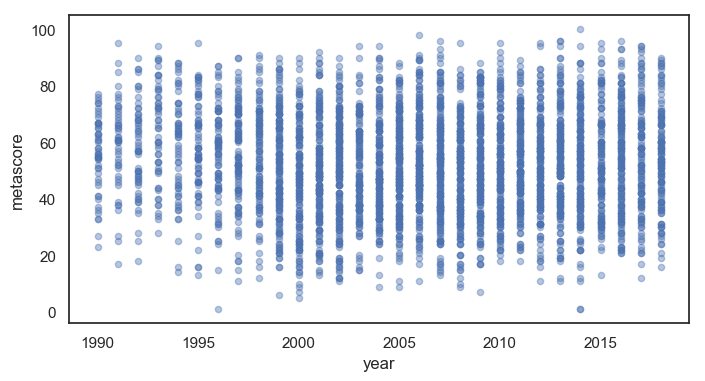

In [236]:
test.plot(kind="scatter",
                      x="year",
                      y="metascore",
                      alpha=0.4)

plt.show()

In [220]:
#fig, ax = plt.subplots(figsize = (9,5))
#sns.distplot(df_90_income.tomatometer_score,bins = 50);
#plt.title("Distribution of metascore among movies", size = 10);


# Error: ould not convert string to float: '50%'
#df_90_income = df_90_income[(df_90_income.tomatometer_score.notnull()) &
#                      (df_90_income.audience_score.notnull())]
#sns.jointplot(x=df_90_income['year'], y=df_90_income['tomatometer_score'],
#              kind="kde").fig.set_size_inches(15,15)

# Works but not pretty 
#plt.figure(figsize=[30,10])
#sns.barplot(x=df_90_income.year, y=df_90_income.metascore, data=df_90_income)

In [221]:
# Ideas:
#1) Look at gender or race in director (men vs women) (balck vs white)

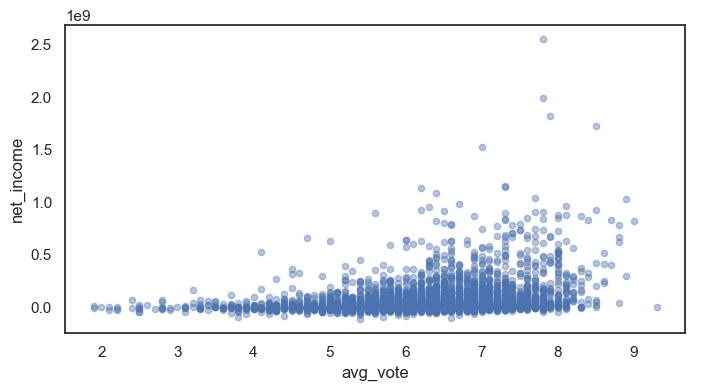

In [250]:
df_budget.plot(kind="scatter",
                      x="avg_vote",
                      y="net_income",
                      alpha=0.4)